In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# The path to our CSV file
holiday_file = "Resources/Holidays2010-2019.csv"
crash_file = "Resources/Metro_Nashville___Davidson_County_Traffic_Crashes__2019_.csv"

# Read our CSV data into pandas
df_holiday = pd.read_csv(holiday_file)
df_crash = pd.read_csv(crash_file)
df_holiday['Date']=pd.to_datetime(df_holiday['Date'])
df_holiday

,Date,Holiday,Day
0,2010-01-01,New Year's Day 2010,Friday
1,2010-01-18,Martin Luther King Day 2010,Monday
2,2010-01-24,Belly Laugh Day 2010,Sunday
3,2010-02-02,Groundhog Day 2010,Tuesday
4,2010-02-12,Lincoln's Birthday 2010,Friday
5,2010-02-14,Valentine's Day 2010,Sunday
6,2010-02-15,Presidents Day and Washington's Birthday 2010,Monday
7,2010-02-16,Mardi Gras Carnival 2010,Tuesday
8,2010-03-14,Daylight Saving 2010,Sunday
9,2010-03-17,St. Patrick's Day 2010,Wednesday


In [24]:
# Test any date
# i.e. crashes_on_date(reduced_df,'01-06-2017')
def crashes_on_date(dataframe,date):
    seriesObj = dataframe.apply(lambda x: True if date in list(x) else False, axis=1)
    numOfRows = len(seriesObj[seriesObj == True].index)
    return(numOfRows)


In [25]:
# Function for querying a dataframe on a certain column value
# i.e. get_row_for_column(reduced_df,'Date','01/06/2017','Weather Description')
def get_row_for_column(dataframe,column,column_value,second_column_value):
    if column=='Date':
        found_rows = dataframe.loc[(
            pd.to_datetime(dataframe[column]) == pd.Timestamp(column_value))]
    else:
        found_rows = dataframe.loc[(
            dataframe[column] == column_value)]
    return(found_rows[second_column_value])


In [26]:
#Get row count for each column
df_crash.count()

Accident Number               284517
Date and Time                 284446
Number of Motor Vehicles      284346
Number of Injuries            284394
Number of Fatalities          284332
Property Damage               125606
Hit and Run                   284479
Reporting Officer             284389
Collision Type Code           284366
Collision Type Description    283841
Weather Code                  284085
Weather Description           284085
Illumination Code             284151
Illumination Description      284126
Harmful Code                  284516
Harmful Code Description      282897
Street Address                284327
City                          277819
State                         281799
ZIP                           274897
RPA                           270262
Precinct                      269411
Latitude                      272145
Longitude                     272139
Mapped Location               272136
dtype: int64

In [27]:
#Drop nan or blank only in date/time column
df_crash['Date and Time'].dropna()

0         01/02/2019 03:58:00 PM
1         01/10/2019 03:37:00 PM
2         02/05/2019 12:30:00 PM
3         02/11/2019 09:53:00 AM
4         02/17/2019 11:06:00 AM
                   ...          
284512    12/08/2009 09:10:00 PM
284513    04/30/2010 05:50:00 PM
284514    07/06/2014 12:45:00 PM
284515    05/19/2010 05:50:00 PM
284516    08/13/2013 12:00:00 AM
Name: Date and Time, Length: 284446, dtype: object

In [28]:
#Split date/time into separate date and time columns
new= df_crash["Date and Time"].str.split(" ", expand = True)
df_crash["Date"] = new[0]
df_crash["Time"] = new[1]+new[2]
df_crash.head()

,Accident Number,Date and Time,Number of Motor Vehicles,Number of Injuries,Number of Fatalities,Property Damage,Hit and Run,Reporting Officer,Collision Type Code,Collision Type Description,...,City,State,ZIP,RPA,Precinct,Latitude,Longitude,Mapped Location,Date,Time
0,20190004211,01/02/2019 03:58:00 PM,2.0,0.0,0.0,NaN,N,256419,11.0,Front to Rear,...,NASHVILLE,TN,NaN,5337.0,NORTH,NaN,NaN,NaN,01/02/2019,03:58:00PM
1,20190025356,01/10/2019 03:37:00 PM,3.0,0.0,0.0,NaN,N,256505,11.0,Front to Rear,...,NASHVILLE,TN,NaN,5339.0,NORTH,NaN,NaN,NaN,01/10/2019,03:37:00PM
2,20190096838,02/05/2019 12:30:00 PM,2.0,0.0,0.0,NaN,N,267831,98.0,OTHER,...,NASHVILLE,TN,NaN,6001.0,WEST,NaN,NaN,NaN,02/05/2019,12:30:00PM
3,20190112437,02/11/2019 09:53:00 AM,3.0,0.0,0.0,NaN,N,591936,11.0,Front to Rear,...,NASHVILLE,TN,NaN,6001.0,WEST,NaN,NaN,NaN,02/11/2019,09:53:00AM
4,20190129966,02/17/2019 11:06:00 AM,2.0,0.0,0.0,NaN,Y,279116,4.0,ANGLE,...,NASHVILLE,TN,NaN,6001.0,WEST,NaN,NaN,NaN,02/17/2019,11:06:00AM


In [34]:
#Remove any rows dated before 2010
reduced_df = df_crash.loc[(
    pd.to_datetime(df_crash["Date"]) > pd.Timestamp('12/31/2009'))]
#reduced_df.count()
reduced_df['Date']=pd.to_datetime(reduced_df['Date'])

reduced_df.info()
#reduced_df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282554 entries, 0 to 284516
Data columns (total 27 columns):
Accident Number               282554 non-null object
Date and Time                 282554 non-null object
Number of Motor Vehicles      282450 non-null float64
Number of Injuries            282498 non-null float64
Number of Fatalities          282438 non-null float64
Property Damage               123643 non-null object
Hit and Run                   282516 non-null object
Reporting Officer             282490 non-null object
Collision Type Code           282471 non-null float64
Collision Type Description    281946 non-null object
Weather Code                  282183 non-null float64
Weather Description           282183 non-null object
Illumination Code             282248 non-null float64
Illumination Description      282223 non-null object
Harmful Code                  282553 non-null object
Harmful Code Description      280934 non-null object
Street Address                28242

//anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [35]:
reduced_df.head()

,Accident Number,Date and Time,Number of Motor Vehicles,Number of Injuries,Number of Fatalities,Property Damage,Hit and Run,Reporting Officer,Collision Type Code,Collision Type Description,...,City,State,ZIP,RPA,Precinct,Latitude,Longitude,Mapped Location,Date,Time
0,20190004211,01/02/2019 03:58:00 PM,2.0,0.0,0.0,NaN,N,256419,11.0,Front to Rear,...,NASHVILLE,TN,NaN,5337.0,NORTH,NaN,NaN,NaN,2019-01-02,03:58:00PM
1,20190025356,01/10/2019 03:37:00 PM,3.0,0.0,0.0,NaN,N,256505,11.0,Front to Rear,...,NASHVILLE,TN,NaN,5339.0,NORTH,NaN,NaN,NaN,2019-01-10,03:37:00PM
2,20190096838,02/05/2019 12:30:00 PM,2.0,0.0,0.0,NaN,N,267831,98.0,OTHER,...,NASHVILLE,TN,NaN,6001.0,WEST,NaN,NaN,NaN,2019-02-05,12:30:00PM
3,20190112437,02/11/2019 09:53:00 AM,3.0,0.0,0.0,NaN,N,591936,11.0,Front to Rear,...,NASHVILLE,TN,NaN,6001.0,WEST,NaN,NaN,NaN,2019-02-11,09:53:00AM
4,20190129966,02/17/2019 11:06:00 AM,2.0,0.0,0.0,NaN,Y,279116,4.0,ANGLE,...,NASHVILLE,TN,NaN,6001.0,WEST,NaN,NaN,NaN,2019-02-17,11:06:00AM


In [36]:
crashes_by_day=pd.DataFrame(reduced_df['Date'].value_counts()).reset_index()
crashes_by_day.columns=["Date","Crashes"]
crashes_by_day['Date'] =pd.to_datetime(crashes_by_day.Date)
crashes_by_day.sort_values(['Date'],inplace=True)
crashes_by_day

,Date,Crashes
3253,2010-01-01,45
3508,2010-01-02,30
3467,2010-01-03,35
2520,2010-01-04,63
2074,2010-01-05,72
1839,2010-01-06,76
5,2010-01-07,176
3424,2010-01-08,38
3470,2010-01-09,35
3520,2010-01-10,27


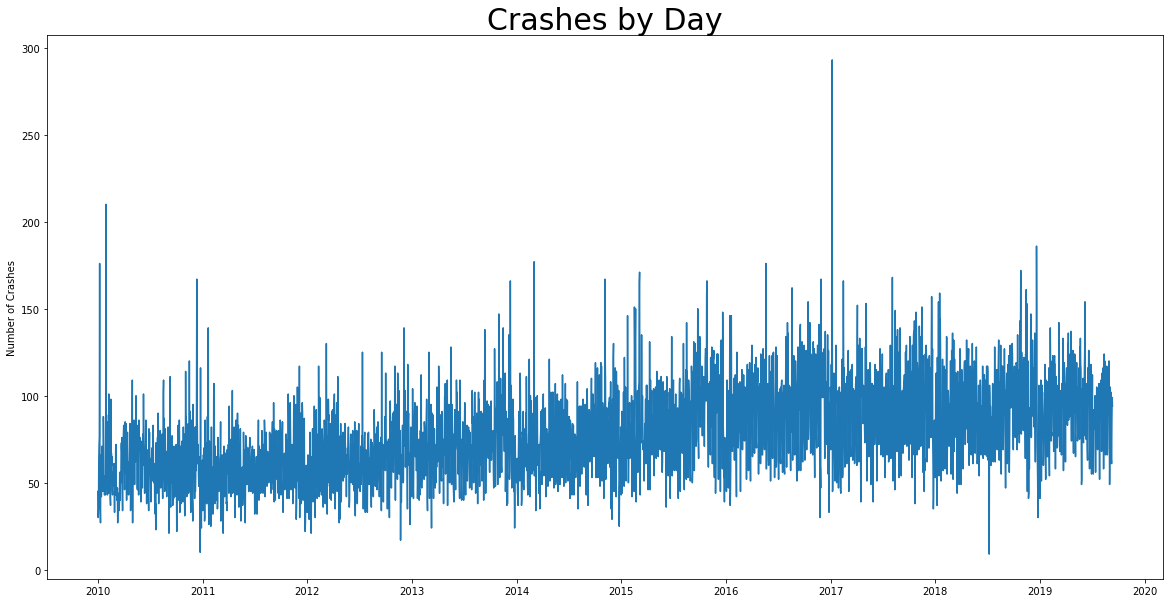

In [75]:

fig = plt.figure(figsize=(20,10))
plt.title("Crashes by Day",fontsize=30)
plt.ylabel("Number of Crashes")
plt.plot(crashes_by_day['Date'],crashes_by_day['Crashes'])
plt.savefig('plots/crashes_by_day.png')

In [42]:
df_inner = pd.merge(reduced_df, df_holiday, on='Date', how='inner')
#df_outer['Holiday'].fillna('No Holiday')
df_inner['Holiday'].dropna()
df_inner

,Accident Number,Date and Time,Number of Motor Vehicles,Number of Injuries,Number of Fatalities,Property Damage,Hit and Run,Reporting Officer,Collision Type Code,Collision Type Description,...,ZIP,RPA,Precinct,Latitude,Longitude,Mapped Location,Date,Time,Holiday,Day
0,2010359258,04/22/2010 08:45:00 AM,2.0,5.0,0.0,N,N,226861,4.0,ANGLE,...,NaN,NaN,NaN,NaN,NaN,NaN,2010-04-22,08:45:00AM,Earth Day 2010,Thursday
1,2010360974,04/22/2010 09:30:00 PM,2.0,0.0,0.0,N,Y,562454,1.0,REAR END,...,NaN,NaN,NaN,NaN,NaN,NaN,2010-04-22,09:30:00PM,Earth Day 2010,Thursday
2,2010359572,04/22/2010 11:20:00 AM,2.0,0.0,0.0,N,N,224412,9.0,UNKNOWN,...,37204,NaN,NaN,NaN,NaN,NaN,2010-04-22,11:20:00AM,Earth Day 2010,Thursday
3,2010360172,04/22/2010 03:40:00 PM,3.0,0.0,0.0,N,Y,676827,4.0,ANGLE,...,37076,9715.0,NaN,NaN,NaN,NaN,2010-04-22,03:40:00PM,Earth Day 2010,Thursday
4,2010359668,04/22/2010 12:22:00 PM,2.0,0.0,0.0,N,Y,226092,9.0,UNKNOWN,...,37207,2011.0,NaN,NaN,NaN,NaN,2010-04-22,12:22:00PM,Earth Day 2010,Thursday
5,2010360528,04/22/2010 05:00:00 PM,2.0,0.0,0.0,N,N,344539,4.0,ANGLE,...,37212,NaN,NaN,NaN,NaN,NaN,2010-04-22,05:00:00PM,Earth Day 2010,Thursday
6,2010359815,04/22/2010 01:25:00 PM,2.0,1.0,0.0,N,N,225153,4.0,ANGLE,...,37208,NaN,NaN,NaN,NaN,NaN,2010-04-22,01:25:00PM,Earth Day 2010,Thursday
7,2010359098,04/22/2010 07:08:00 AM,1.0,0.0,0.0,N,N,716897,2.0,HEAD-ON,...,37215,6309.0,MIDTOW,36.0707,-86.8289,"(36.0707, -86.8289)",2010-04-22,07:08:00AM,Earth Day 2010,Thursday
8,2010359094,04/22/2010 07:00:00 AM,3.0,0.0,0.0,N,N,687815,1.0,REAR END,...,37013,8927.0,SOUTH,36.0505,-86.6147,"(36.0505, -86.6147)",2010-04-22,07:00:00AM,Earth Day 2010,Thursday
9,2010358244,04/22/2010 12:25:00 AM,1.0,1.0,0.0,N,Y,527754,0.0,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,...,37208,4415.0,NORTH,36.1801,-86.8110,"(36.1801, -86.811)",2010-04-22,12:25:00AM,Earth Day 2010,Thursday


In [37]:

crashes_by_holiday=pd.DataFrame(df_inner['Holiday'].value_counts()).reset_index()
crashes_by_holiday.columns=['Holiday','Crashes']
#crashes_by_holiday['Holiday']=pd.to_datetime(crashes_by_day.Date)
crashes_by_holiday.sort_values(['Holiday'],inplace=True)
crashes_by_holiday


,Holiday,Crashes
123,April Fool's Day 2010,83
177,April Fool's Day 2011,72
345,April Fool's Day 2012,44
186,April Fool's Day 2013,70
137,April Fool's Day 2014,80
40,April Fool's Day 2015,106
15,April Fool's Day 2016,129
165,April Fool's Day 2017,74
313,April Fool's Day 2018,49
42,April Fool's Day 2019,105


In [68]:
new_holiday=crashes_by_holiday["Holiday"].str.split(" 2", expand = True)
crashes_by_holiday["Holiday Name"] = new_holiday[0]
crashes_by_holiday["Year"] = "2"+new_holiday[1]
crashes_by_holiday['Holiday Name'].head()
grouped_crashes_by_holiday=crashes_by_holiday.groupby(['Holiday Name']).sum()

grouped_crashes_by_holiday=pd.DataFrame(grouped_crashes_by_holiday).reset_index()
grouped_crashes_by_holiday

,Holiday Name,Crashes
0,April Fool's Day,812
1,Armed Forces Day,723
2,Belly Laugh Day,709
3,Black Friday,479
4,Boss's Day,830
5,Christmas Day,379
6,Cinco de Mayo,903
7,Citizenship Day,795
8,Columbus Day,660
9,Cyber Monday,946


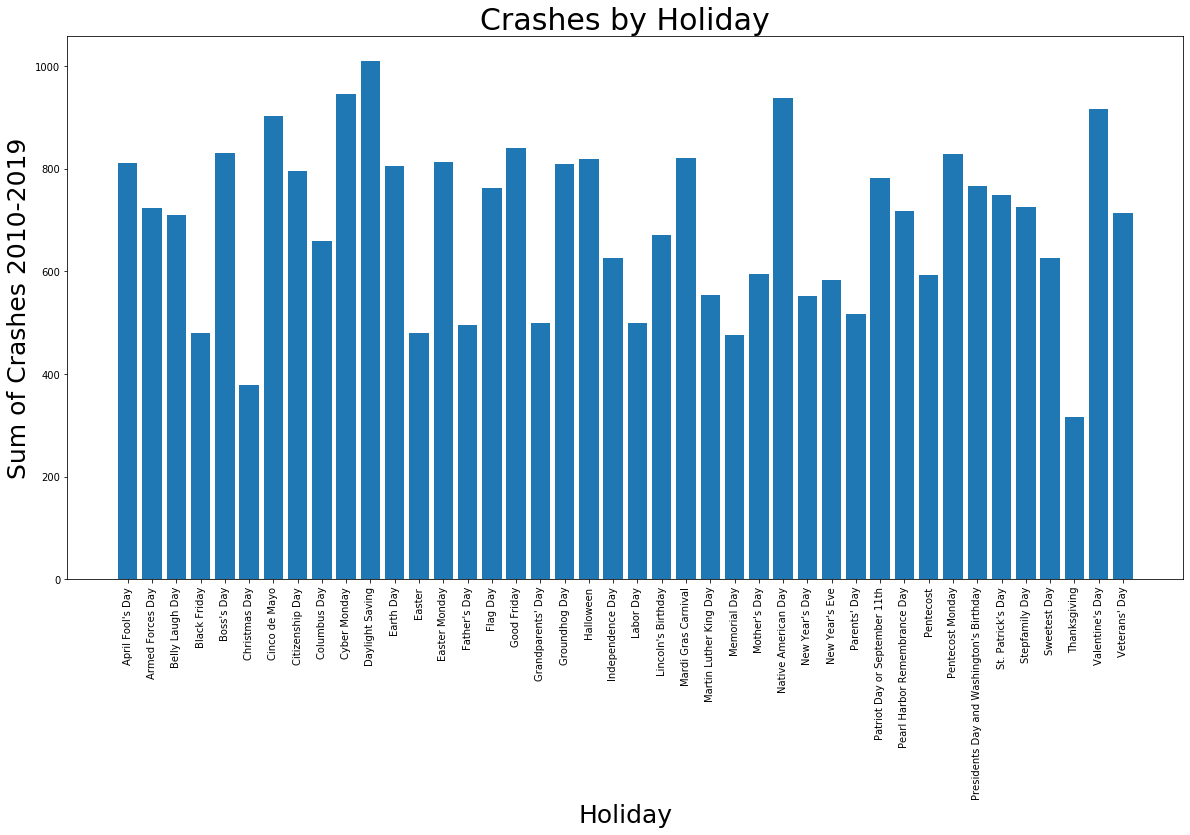

In [77]:
fig = plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.title('Crashes by Holiday',fontsize=30)
plt.ylabel('Sum of Crashes 2010-2019',fontsize=25)
plt.xlabel('Holiday',fontsize=25)
plt.bar(grouped_crashes_by_holiday['Holiday Name'],grouped_crashes_by_holiday['Crashes'])
plt.savefig('plots/crashes_by_holiday.png')

In [70]:
main_holidays=['Christmas Day','Thanksgiving','New Year\'s Day','New Year\s Eve','Independence Day']
specific_holidays={}
for holiday in main_holidays:
    specific_holidays[holiday]=grouped_crashes_by_holiday.loc[(
        grouped_crashes_by_holiday['Holiday Name'] == holiday)]
specific_holidays[main_holidays[0]]

,Holiday Name,Crashes
5,Christmas Day,379


KeyError: 'Holiday Name'

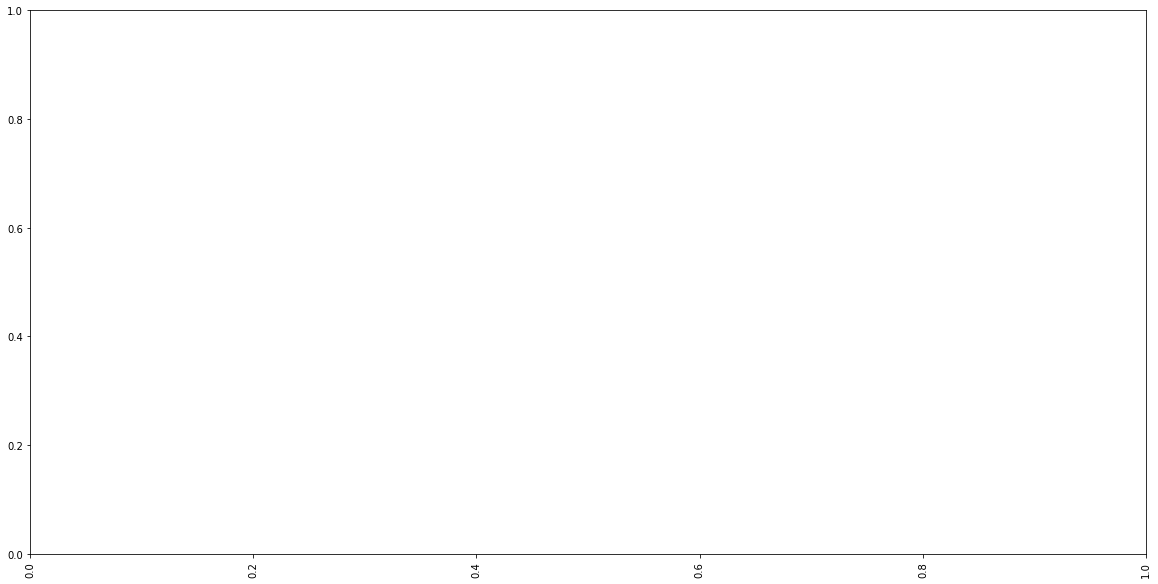

In [71]:
#fig = plt.figure(figsize=(20,10))
#plt.xticks(rotation=90)
#for holiday in main_holidays:
#    plt.bar(specific_holidays[holiday],specific_holidays['Crashes'])

In [43]:
crashes_on_date(df_inner,'2016-03-27')

0